# Cycleways and their impact in New Zealand 

### Aim:
* Illustrate the current status and historical development of cycleways in New Zealand
* Investigate the impact of cycleway development on the popularity of cycling (recreation or utility)
* Develop my skills using Python in the Jupyter Notebooks framework to process, display and analyse data
* Begin to develop my own processes for projects of interest such as these

### Background

###### My own learning
This will be my first personal research project using Python on Jupyter Notebooks. I'm also generally inexperienced with programming and as a result I fully expect this to be a slow and frustrating process as I get to grips with the intricacies. However I hope that this will ultimately be a rewarding and interesting piece of work. By documenting my steps I will intend to consolidate the learning that I do, aiding me in the future. If this can be of interest to anyone else, well all the better.

Although I will tidy up this notebook in order to share it, I intend to not make wholesale changes to how I undertook my analysis - that is, as I begin to understand my findings, I will develop on them as I did in the order that I did in reality, for the most part.

###### Why cycleways?
* I am an advocate for cycling. I enjoy it for recreation and utility; I commute to work by bicycle most days and use my bike to get around the city by default. For me there are many more reasons _to_ cycle than _not to_ cycle.

* However I understand that I am lucky enough to have grown up cycling; it was the default mode of transport when I was young too. Among other things, I recognise that this has given me confidence to cycle in traffic without major concern.

* For me, and I think it safe to assume most people, cycling away from (particularly busy) traffic is a more positive and enjoyable experience. It is also much more accessible for those newer to cycling or less accustomed to cycling in traffic.

* There is a commonly held belief that New Zealand is a forward thinking, relatively liberal country. It places high value on sustainaibility and the natural environment; as well as its citizen's health, clean air and encouraging physical exercise.

* I thought it would be interesting to investigate whether or not this would translate into significant investment into cycling infrastructure. Additionally whether or not increased levels of infrastructure would deliver a discernible uptake in cycling.

## Datasets used

### From the New Zealand government transport data portal:  
https://www.nzta.govt.nz/planning-and-investment/learning-and-resources/transport-data/data-and-tools/

###### Physical statistics - cycleways
"The length of cycleways within Road Controlling Authority areas, each region and NZ...over the last 10 years"  
Uploaded to my github here:  
https://github.com/phtevegibson/data-projects/blob/main/datasets/PSCycleways.xlsx?raw=true

###### Physical statistics - roads
"The length of urban and rural, sealed and unsealed roads within Road Controlling Authority areas, each region and NZ...over the last 10 years"  
Uploaded to my github here:  
https://github.com/phtevegibson/data-projects/blob/main/datasets/PSRoads.xlsx?raw=true
    
### From stats and insights section of the New Zealand government transport website:  
https://www.transport.govt.nz/statistics-and-insights/household-travel

###### Regional travel: 2015-1018
"The New Zealand Household Travel Survey is an ongoing survey of household travel conducted for the Ministry of Transport. Between 2015 and 2018, each year people in over 2,000 households throughout New Zealand were invited to participate in the survey, by recording all their travel over a 7-day period. Each person in the household was asked about their travel and other related information.

Note that this travel survey captures travel in the road/footpath environment (and domestic flights and ferries) — off-road activities such as mountain biking and hiking are not included in these estimates. The 2015–2018 data is from 8,267 people in 4,144 households, collected between October 2015 and July 2018. Professional driver trips (including cycling trips such as mail and pamphlet delivery) have been excluded from the analysis."  
Uploaded to my github here:  
https://github.com/phtevegibson/data-projects/blob/main/datasets/Regions_travel-by-residents-2015_2018_revised.xlsx?raw=true

## Import modules to setup notebook

In [1]:
#import useful modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set the seaborn style to my preference
sns.set_style('darkgrid')

## Physical statistics - cycleways
First steps:
* Read in dataset
* Have a look at data
* Prepare it for use
* Quick summary

In [2]:
#read cycleways excel data file from my github
url_git_pscycleways = 'https://github.com/phtevegibson/data-projects/blob/main/datasets/PSCycleways.xlsx?raw=true'

df_cycleways = pd.read_excel(url_git_pscycleways,sheet_name=1,header=0,engine='openpyxl')

#show size of dataframe and display first 5 rows to get an idea of what we are dealing with
print (df_cycleways.shape)
df_cycleways.head()

(3101, 13)


,Region/Authority Type,Region/Authority,Measure,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20
0,National,New Zealand,km,1148.75,1323.6,1442.8,1580.6,1580.1,1859.5,2299.9,2410.3,2981.2,3283.3
1,Regional,Auckland,km,111.80,114.0,117.7,123.3,129.0,140.8,319.5,317.3,534.3,556.4
2,Regional,Bay of Plenty,km,14.40,17.3,18.6,40.1,42.4,289.1,317.2,323.3,354.5,356.9
3,Regional,Canterbury,km,377.80,392.5,405.7,414.4,466.9,458.7,484.4,526.1,644.1,710.8
4,Regional,Gisborne,km,15.30,15.3,15.5,16.5,17.0,34.0,33.2,34.0,68.0,42.5


In [3]:
#measure column contains only 1 unique value (kms), therefore drop this column to simplify
df_cycleways=df_cycleways.drop(columns=['Measure'])

#melt column year columns to make df narrow and deep - this makes it easier to plot
#the id_vars from column title that we don't specify (all the years) become values in a new column (name: variable)
df_cycleways=df_cycleways.melt(id_vars=['Region/Authority','Region/Authority Type'])

#rename columns to make them more user-friendly
df_cycleways=df_cycleways.rename(columns={"Region/Authority": "Area", "Region/Authority Type": "Type",
                                          "variable": "Year", "value": "Cycleways(km)"})

#check we did what we intended
print (df_cycleways.shape)
df_cycleways.head()

(31010, 4)


,Area,Type,Year,Cycleways(km)
0,New Zealand,National,2010/11,1148.75
1,Auckland,Regional,2010/11,111.80
2,Bay of Plenty,Regional,2010/11,14.40
3,Canterbury,Regional,2010/11,377.80
4,Gisborne,Regional,2010/11,15.30


We can partly summarise this data by plotting the total length of cycleways in New Zealand over the last 10 years

(0.0, 3390.0275)

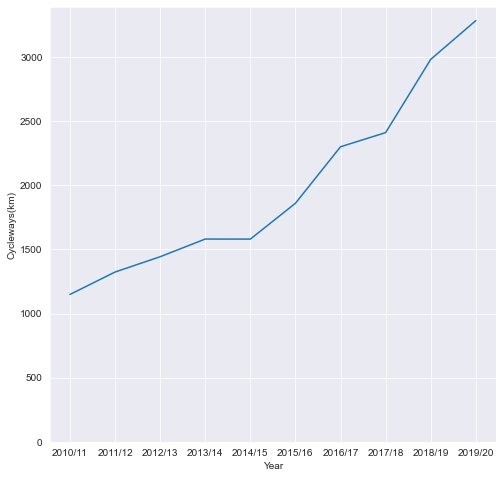

In [4]:
#set a decent plot size and font scale so its readable
size = 8
fig, ax = plt.subplots(figsize=(size, size))
sns.set_theme(font_scale=0.8)

#plot just the national (New Zealand) data
sns.lineplot(data=df_cycleways.query("Area=='New Zealand'"), x="Year", y="Cycleways(km)")

#set the y axis to 0 for clarity
plt.ylim(0)

Well that's a positive for a start. We can see very clearly that the length of total cycleway in New Zealand is increasing pretty fast. That's good, but I don't really know how useful 1000, 2000 or 3000kms of cycleway really is for getting around.

## Accessibility
Instead of the total length of cycleways, a more useful measure could be how much of New Zealand's road network is also serviced by a cycle specific route. That is, how much of what is accessibile by car can also be accessed by cycleway.

In order to understand this, I will need to obtain the equivalent data for roads in New Zealand as we have for cycleways above.

I'm making a few assumptions here which could lead to some inaccuracies. I'll briefly discuss these towards the end of the notebook.

In [5]:
df_cycleways=df_cycleways.groupby(by=['Type','Area','Year']).sum()
df_cycleways=df_cycleways.reset_index()
print(df_cycleways.shape)
df_cycleways.head()

(780, 4)


,Type,Area,Year,Cycleways(km)
0,National,New Zealand,2010/11,1148.75
1,National,New Zealand,2011/12,1323.60
2,National,New Zealand,2012/13,1442.80
3,National,New Zealand,2013/14,1580.60
4,National,New Zealand,2014/15,1580.10


## Physical statistics - roads
First steps:
* Read in dataset
* Have a look at data
* Prepare it for use
* Quick summary

In [6]:
#read roads dataset from my github
url_git = 'https://github.com/phtevegibson/data-projects/blob/main/datasets/PSRoads.xlsx?raw=true'
df_roads = pd.read_excel(url_git, engine='openpyxl', sheet_name=1,header=0)

#show size and first 5 rows
print (df_roads.shape)
df_roads.head()

(480, 15)


,Region/Authority Type,Region/Authority,UR,Measure,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20
0,National,New Zealand,Rural,km,75793.600,75771.400,75777.183,75743.8,75583.9,75527.3,75601.5,75659.6,75544.1,76543.1,76432.8
1,National,New Zealand,Rural,Lane km,138338.139,139418.686,139085.430,138692.4,139441.3,140098.2,140859.3,140332.7,140298.3,141689.5,141835.5
2,National,New Zealand,Urban,km,17835.300,17931.300,18090.100,18287.4,18529.7,18785.3,18897.0,19108.3,19340.1,19680.5,19957.1
3,National,New Zealand,Urban,Lane km,35214.600,35572.100,35691.000,36121.9,36614.3,37117.1,37360.7,37813.1,38260.8,38904.9,39438.8
4,National,New Zealand,Special Purpose,km,496.600,498.400,500.400,498.8,501.2,509.6,504.0,504.0,502.1,458.2,458.1


In [7]:
#melt year columns to make df narrow and deep as before
df_roads=df_roads.melt(id_vars=['Region/Authority','Region/Authority Type','UR','Measure'])

#rename columns to make them more user-friendly and consistent with cycleways df
df_roads=df_roads.rename(columns={"Region/Authority": "Area", "Region/Authority Type": "Type", 
                                  "variable": "Year", "value": "Roads(km)"})

#check
print (df_roads.shape)
df_roads.head()

(5280, 6)


,Area,Type,UR,Measure,Year,Roads(km)
0,New Zealand,National,Rural,km,2009/10,75793.600
1,New Zealand,National,Rural,Lane km,2009/10,138338.139
2,New Zealand,National,Urban,km,2009/10,17835.300
3,New Zealand,National,Urban,Lane km,2009/10,35214.600
4,New Zealand,National,Special Purpose,km,2009/10,496.600


###### Lane kms
* From a quick web search I found that _lane_ kms refers to the total length of single lane width road surface
* That is, for a 1km long stretch of 3 lane wide motorway, the number of lane kms will be 3km, whereas the number of plain vanilla kms will be 1km
* For this project I am only interested the length of road in terms of accessibility and how far that road can take you, therefore I will discount lane kms

In [8]:
#drop 'lane km' as this type of measure isn't relevant to our analysis
df_roads = df_roads.drop(df_roads[df_roads['Measure']=='Lane km'].index)

#can now drop Measure column as it only contains 1 unique value (km)
df_roads=df_roads.drop(columns=['Measure'])

#our cycleways dataframe does not have values for 09/10 or the Chatham Islands so drop these too
df_roads = df_roads.drop(df_roads[df_roads['Year']=='2009/10'].index)
df_roads = df_roads.drop(df_roads[df_roads['Area']=='Chatham Islands'].index)

#check
print (df_roads.shape)
df_roads.head()

(2380, 5)


,Area,Type,UR,Year,Roads(km)
480,New Zealand,National,Rural,2010/11,75771.4
482,New Zealand,National,Urban,2010/11,17931.3
484,New Zealand,National,Special Purpose,2010/11,498.4
486,Auckland,Regional,Rural,2010/11,3115.7
488,Auckland,Regional,Urban,2010/11,4371.0


###### UR
For this project I have no requirement to discern between different types of road (UR column), and have no equivalent to compare this measure to in the cycleways df. I could revisit this at later stage. For now I will sum the count of kms to give us a dataframe of the same form as the cycleways data

In [9]:
#sum types of road for each area and year. use reset index to turn the df back into a standard df from a 'groupby' type
df_roads=df_roads.groupby(by=['Type','Area','Year']).sum()
df_roads=df_roads.reset_index()

#check
print (df_roads.shape)
df_roads.head()

(1170, 4)


,Type,Area,Year,Roads(km)
0,National,New Zealand,2010/11,94201.100
1,National,New Zealand,2011/12,94367.683
2,National,New Zealand,2012/13,94530.000
3,National,New Zealand,2013/14,94614.800
4,National,New Zealand,2014/15,94822.200


We can get a reasonable picture of this data by plotting all the regional data on a line plot

(0.0, 16895.065)

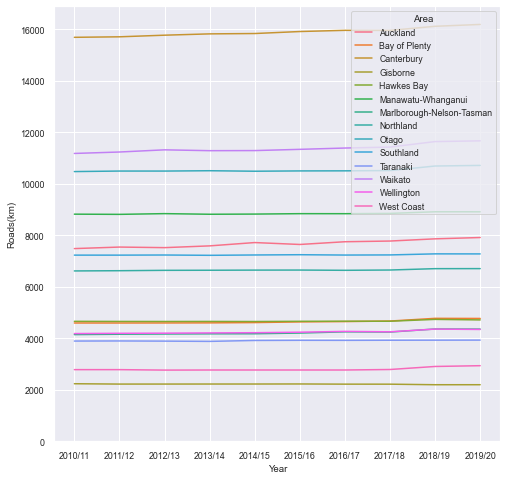

In [10]:
#set a decent plot size and font scale so its readable
size = 8
fig, ax = plt.subplots(figsize=(size, size))
sns.set_theme(font_scale=0.8)

#plot just the regional data
sns.lineplot(data=df_roads.query("Type=='Regional'"), hue="Area", x="Year", y="Roads(km)")

#set the y axis to 0 for clarity
plt.ylim(0)

This gives us at least an idea of the scale of roads in New Zealand and that some regions have more roads than others (unsurprising). Perhaps more interest would be to understand the percentage increase in road length for each region, year on year.

Turns out implementing this idea was a little more difficult than I anticipated but turned out to be a useful learning exercise.

In [11]:
#use the shift function to add a new column of the previous years' road length so that we can perform operations using it next
df_roads["Roads(km)_previous_year"] = df_roads["Roads(km)"].shift(periods=1)
df_roads.head()

,Type,Area,Year,Roads(km),Roads(km)_previous_year
0,National,New Zealand,2010/11,94201.100,NaN
1,National,New Zealand,2011/12,94367.683,94201.100
2,National,New Zealand,2012/13,94530.000,94367.683
3,National,New Zealand,2013/14,94614.800,94530.000
4,National,New Zealand,2014/15,94822.200,94614.800


In [12]:
#function to calculate the percentage increase in road length from last year to this year
def percentage_change(year, length_current, length_previous):
    #can't calculate this for our first year of data
    if year == "2010/11":
        return 0
    #catch any dividing by 0 errors
    elif length_previous == 0:
        return 0
    else:
        return ((length_current - length_previous)/length_previous)*100

#use of apply function to apply our function above
df_roads["Road length % change"] = df_roads.apply(lambda x: percentage_change(x["Year"], x["Roads(km)"], x["Roads(km)_previous_year"]),axis=1)

#remove extra column which is no longer needed
df_roads=df_roads.drop(columns=["Roads(km)_previous_year"])

df_roads.head()

,Type,Area,Year,Roads(km),Road length % change
0,National,New Zealand,2010/11,94201.100,0.000000
1,National,New Zealand,2011/12,94367.683,0.176838
2,National,New Zealand,2012/13,94530.000,0.172005
3,National,New Zealand,2013/14,94614.800,0.089707
4,National,New Zealand,2014/15,94822.200,0.219205


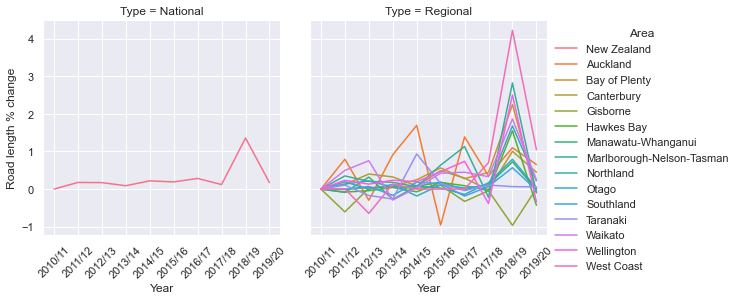

In [13]:
#set a decent plot size and font scale so its readable
size = 4
sns.set_theme(font_scale=1)

g = sns.FacetGrid(df_roads[df_roads['Type']!='Territorial'], col="Type", hue="Area", height=size, aspect=1)

g.map(sns.lineplot, "Year", "Road length % change")

g.set_xticklabels(rotation=45)

g.add_legend()

In [14]:
#mean change in road length nationwide:
df_roads[df_roads['Type']=='National']["Road length % change"].mean()

0.27816139032736065

In [15]:
#largest % change, excluding territorial:
df_roads.iloc[df_roads[df_roads['Type']!='Territorial']["Road length % change"].idxmax()]

Type                      Regional
Area                    West Coast
Year                       2018/19
Roads(km)                   2907.1
Road length % change       4.21955
Name: 148, dtype: object

The regional plot is quite busy so I included this as a facetgrid plot; showing the overall New Zealand trend more clearly: fairly steady year on year increase of 0.26%, except in 2018/19. 

A large increase is seen across the country in this year, the largest percentage increase is 4.2% on the West Coast. Whether this really was a big year for road building, or there was some change to how the road length is calculated I'm not sure. Although the fact that the % change drops back down to around its average value the following year suggests the value is accurate.

### Cycleways length % change

In [16]:
df_cycleways.head()

,Type,Area,Year,Cycleways(km)
0,National,New Zealand,2010/11,1148.75
1,National,New Zealand,2011/12,1323.60
2,National,New Zealand,2012/13,1442.80
3,National,New Zealand,2013/14,1580.60
4,National,New Zealand,2014/15,1580.10


In [17]:
#use the shift function to add a new column of the previous years' cycleway length
df_cycleways["Cycleways(km)_previous_year"] = df_cycleways["Cycleways(km)"].shift(periods=1)

#use of apply function to apply our function above
df_cycleways["Cycleways length % change"] = df_cycleways.apply(lambda x: percentage_change(x["Year"],
                                                                                           x["Cycleways(km)"],
                                                                                           x["Cycleways(km)_previous_year"]),
                                                                                           axis=1)

#remove extra column which is no longer needed
df_cycleways=df_cycleways.drop(columns=["Cycleways(km)_previous_year"])

df_cycleways.head()

,Type,Area,Year,Cycleways(km),Cycleways length % change
0,National,New Zealand,2010/11,1148.75,0.000000
1,National,New Zealand,2011/12,1323.60,15.220892
2,National,New Zealand,2012/13,1442.80,9.005742
3,National,New Zealand,2013/14,1580.60,9.550873
4,National,New Zealand,2014/15,1580.10,-0.031634


In [18]:
df_cycleways[df_cycleways['Type']=='Territorial']['Area'].nunique()

63

There are 63 different territorial areas, which can make plots too busy and difficult to understand

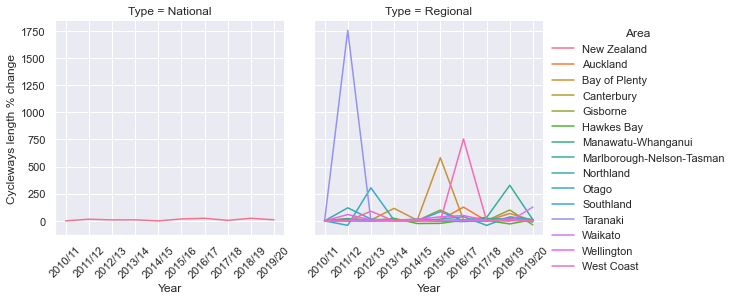

In [19]:
#set a decent plot size and font scale so its readable
size = 4
sns.set_theme(font_scale=1)

#don't plot territorial areas
g = sns.FacetGrid(df_cycleways.query("Type!='Territorial'"), #df_cycleways[df_cycleways['Type']!='Territorial'], ***same thing
                  col="Type", hue="Area", height=size, aspect=1)

g.map(sns.lineplot, "Year", "Cycleways length % change")

g.set_xticklabels(rotation=45)

g.add_legend()

Have a quick look at that big spike in 2011/12:

In [20]:
#largest year on year percentage change in cycleway length:
df_cycleways.iloc[df_cycleways["Cycleways length % change"].idxmax()]

Type                           Territorial
Area                         Tauranga City
Year                               2015/16
Cycleways(km)                          244
Cycleways length % change             6000
Name: 625, dtype: object

And a more general look at the Taranaki data behind that:

In [21]:
df_cycleways.query("Area=='Taranaki'")

,Type,Area,Year,Cycleways(km),Cycleways length % change
110,Regional,Taranaki,2010/11,4.3,0.000000
111,Regional,Taranaki,2011/12,79.8,1755.813953
112,Regional,Taranaki,2012/13,83.1,4.135338
113,Regional,Taranaki,2013/14,83.1,0.000000
114,Regional,Taranaki,2014/15,86.6,4.211793
115,Regional,Taranaki,2015/16,87.3,0.808314
116,Regional,Taranaki,2016/17,92.0,5.383734
117,Regional,Taranaki,2017/18,93.7,1.847826
118,Regional,Taranaki,2018/19,95.4,1.814301
119,Regional,Taranaki,2019/20,96.5,1.153040


It seems the problem with this measure is how easily most areas can be dwarfed by large increases in cycleway, relative to what already existed. Makes more sense to show just the national cycleway % change, year on year, as below:

(0.0, 100.0)

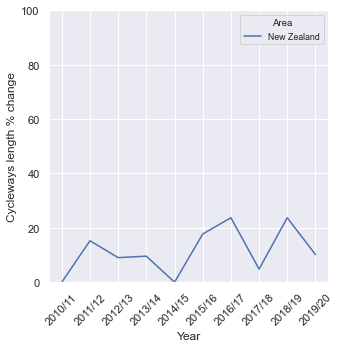

In [22]:
#set a decent plot size and font scale so its readable
size = 5
fig, ax = plt.subplots(figsize=(size, size))
sns.set_theme(font_scale=0.8)

#plot just the regional data
sns.lineplot(data=df_cycleways.query("Type=='National'"), hue="Area", x="Year", y="Cycleways length % change")

plt.xticks(rotation=45)
plt.ylim(0,100)

In [23]:
df_cycleways[df_cycleways['Type']=='National']['Cycleways length % change'].mean()

11.373164528881956

## Combine cycleways and roads data

To combine the cycleways and roads datasets we'll need to be sure we are combine the right rows with each other - therefore we need to check they have the same number of rows

In [24]:
print(df_cycleways.shape)
print(df_roads.shape)

(780, 5)
(1170, 5)


In [25]:
df_cycleways['Type'].value_counts()

Territorial    630
Regional       140
National        10
Name: Type, dtype: int64

In [26]:
df_roads['Type'].value_counts()

Territorial    1020
Regional        140
National         10
Name: Type, dtype: int64

It seems we have some additional territorial type areas in the roads dataset. For simplicity we will just drop all territorial type areas from both datasets

In [27]:
df_cycleways = df_cycleways.drop(df_cycleways[df_cycleways['Type']=='Territorial'].index)
df_roads = df_roads.drop(df_roads[df_roads['Type']=='Territorial'].index)

In [28]:
#Check:
print(df_cycleways.shape)
print(df_roads.shape)

(150, 5)
(150, 5)


In [29]:
#create new infrastructure dataframe to combine datasets
df_infrastructure = pd.merge(df_cycleways,df_roads)

#create new column as a ratio of cycleway to road length for each area and year
df_infrastructure['Cycleway to road length(%)'] = (df_infrastructure['Cycleways(km)']/df_infrastructure['Roads(km)'])*100

df_infrastructure.head()

,Type,Area,Year,Cycleways(km),Cycleways length % change,Roads(km),Road length % change,Cycleway to road length(%)
0,National,New Zealand,2010/11,1148.75,0.000000,94201.100,0.000000,1.219466
1,National,New Zealand,2011/12,1323.60,15.220892,94367.683,0.176838,1.402599
2,National,New Zealand,2012/13,1442.80,9.005742,94530.000,0.172005,1.526288
3,National,New Zealand,2013/14,1580.60,9.550873,94614.800,0.089707,1.670563
4,National,New Zealand,2014/15,1580.10,-0.031634,94822.200,0.219205,1.666382


(0.0, 3.498692382150149)

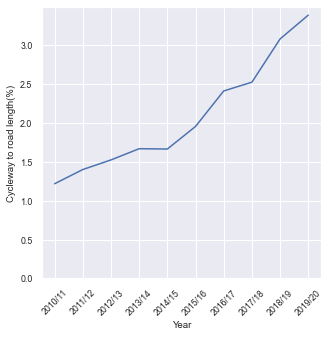

In [30]:
#plot the national trend
size=5
fig, ax = plt.subplots(figsize=(size, size))
sns.set_theme(font_scale=1.05)
sns.lineplot(data=df_infrastructure.query("Area=='New Zealand'"), x="Year", y="Cycleway to road length(%)",
             hue='Area',style='Area',legend=False)
plt.xticks(rotation=45)
plt.ylim(0)

A nice positive trend here again, cycleways steadily increasing against road length year on year

<h3>Travel section</h3>

In order to see if we could link increasing cycleways with an uptake in cycling, I found a dataset containing the results from a survey performed by the New Zealand Government on the modes of tranport used by a selection of a households over a period

In [31]:
url_git = 'https://github.com/phtevegibson/data-projects/blob/main/datasets/Regions_travel-by-residents-2015_2018_revised.xlsx?raw=true'

In [32]:
#read excel file, each sheet becomes a value in dictionary
df_dict = pd.read_excel(url_git,engine='openpyxl',sheet_name=None)

C:\Users\sgibs\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [33]:
#create list of sheet names
sheet_names = list(df_dict.keys())
sheet_names

['Contents',
 'Notes - Please Read',
 'New Zealand',
 'Northland',
 'Auckland',
 'Waikato',
 'Bay of Plenty',
 'Gisborne',
 'Hawkes Bay',
 'Taranaki',
 'Manawatu_Wanganui',
 'Wellington',
 'Nelson_Marlborough_Tasman',
 'West Coast',
 'Canterbury',
 'Otago',
 'Southland']

In [34]:
#compare to place names in infrastructure df
list(df_infrastructure['Area'].unique())

['New Zealand',
 'Auckland',
 'Bay of Plenty',
 'Canterbury',
 'Gisborne',
 'Hawkes Bay',
 'Manawatu-Whanganui',
 'Marlborough-Nelson-Tasman',
 'Northland',
 'Otago',
 'Southland',
 'Taranaki',
 'Waikato',
 'Wellington',
 'West Coast']

In [35]:
#remove first 2 sheets as not part of dataset
del(sheet_names[0:2])

#check
sheet_names

['New Zealand',
 'Northland',
 'Auckland',
 'Waikato',
 'Bay of Plenty',
 'Gisborne',
 'Hawkes Bay',
 'Taranaki',
 'Manawatu_Wanganui',
 'Wellington',
 'Nelson_Marlborough_Tasman',
 'West Coast',
 'Canterbury',
 'Otago',
 'Southland']

Next we better see what sort of state the data is in, on each sheet:

In [36]:
df_dict['Auckland'].head(20)

,New Zealand Household Travel Survey 2015 - 2018,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Ministry of Transport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Travel by residents of Auckland (all ages),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Click here to return to Contents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(Scroll right to view more of the table),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015 - 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Mode of travel,Sample: People with any trips,Trip legs in sample,NaN,Million km per year,Million hours per year,Million trip legs per year,NaN,Mode share of distance,Mode share of duration,Mode share of trip legs,NaN,Km per person per year,Trip legs per person per year,Hours per person per year
9,1.Car/ van driver,982,23508,NaN,10398.5,300.236,1221.11,NaN,0.628801,0.5708,0.5763,NaN,6443.33,756.654,186.039


I'd like to compile all sheets into 1 dataframe, therefore there are a number of steps we need to perform for each sheet. As we can see from the Auckland sheet above:
* Make index 8 the column names
* Remove rows preceeding index 8
* Remove rows below index 16
* Remove columns at positions 3, 7, 11
* Add column specifying location (Area, for consistency)

In [37]:
#create a new, empty df
df_travel=pd.DataFrame()

#iterate over dictionary values (dfs), performing each step above and adding it to the new travel df
for sheet in sheet_names:
    df_sheet = df_dict[sheet]
    df_sheet.columns = df_sheet.iloc[8]
    df_sheet=df_sheet.drop(df_sheet.index[0:9])
    df_sheet=df_sheet.drop(df_sheet.index[8:])
    
    df_sheet.insert(0,column='Area',value=sheet)
    
    df_travel=pd.concat([df_travel,df_sheet])
    
df_travel.columns = df_travel.columns.fillna('to_drop')
df_travel.drop('to_drop', axis = 1, inplace = True)
df_travel=df_travel.reset_index(drop=True)

df_travel.head(10)

,Area,Mode of travel,Sample: People with any trips,Trip legs in sample,Million km per year,Million hours per year,Million trip legs per year,Mode share of distance,Mode share of duration,Mode share of trip legs,Km per person per year,Trip legs per person per year,Hours per person per year
0,New Zealand,1.Car/ van driver,5956,139005,32865,824.527,3750.68,0.645985,0.581,0.595,7003.73,799.292,175.712
1,New Zealand,2.Car/van passgr,4270,42479,13562.3,348.121,1509.85,0.266577,0.2453,0.2395,2890.21,321.757,74.1866
2,New Zealand,3.Pedestrian,3706,25493,666.451,143.241,751.22,0.0130996,0.1009,0.1192,142.025,160.09,30.5255
3,New Zealand,4.Cyclist,435,2933,304.156,21.8782,82.3141,0.00597839,0.0154,0.0131,64.8174,17.5416,4.66238
4,New Zealand,5.PT (bus/train/ferry),749,3953,1459.36,60.2115,157.68,0.0286848,0.0424,0.025,310.999,33.6025,12.8314
5,New Zealand,6.Motorcyclist,64,532,113.243,2.67275,11.7545,0.00222588,0.0019,0.0019,24.1329,2.50495,0.56958
6,New Zealand,7.Other household travel,346,1395,1905.29,18.3808,39.8619,0.0374498,0.013,0.0063,406.029,8.49481,3.91705
7,New Zealand,Total,8267,215790,50875.8,1419.03,6303.35,1,1,1,10841.9,1343.28,302.404
8,Northland,1.Car/ van driver,248,5433,1522.52,30.3341,132.649,0.634652,0.5708,0.5861,8867.35,772.564,176.669
9,Northland,2.Car/van passgr,143,1541,737.08,14.9565,64.0432,0.307246,0.2814,0.283,4292.84,372.995,87.1083


So that we can combine this travel df with our previous infrastructure df, we need to:
* Swap underscores for hyphens in place names
* Re-order to 'Marlborough-Nelson-Tasman'
* Alphabetise list
* Put New Zealand back to the top of the list after alphabetising

In [38]:
for i in list(df_travel[df_travel['Area']=='Manawatu_Wanganui'].index):
    df_travel['Area'][i] = 'Manawatu-Whanganui'
    
for i in list(df_travel[df_travel['Area']=='Nelson_Marlborough_Tasman'].index):
    df_travel['Area'][i] = 'Marlborough-Nelson-Tasman'

#store just NZ values as a new df
df_travel_NZ = df_travel[df_travel['Area']=='New Zealand']    

#drop NZ rows
df_travel = df_travel.drop(df_travel[df_travel['Area']=='New Zealand'].index)

#sort remaining rows alphabetically
df_travel = df_travel.sort_values(by=['Area','Mode of travel'])

#return NZ rows to top of df
df_travel=pd.concat([df_travel_NZ,df_travel], ignore_index=True)

It seems important to highlight here, I would like to see if the length of road also accessed by cycleway increases the amount of people cycling over people driving. Other measures could be investigated, but for now that is the question I will try and answer

I'm sure I should have highlighted this as my focus or question from the offset

In [39]:
#to answer the above, we will only compare cyclist numbers against driver numbers - all over modes of travel will be discounted
rows_mask=df_travel['Mode of travel'].isin(['Total','2.Car/van passgr','3.Pedestrian',
                                                  '5.PT (bus/train/ferry)','6.Motorcyclist','7.Other household travel'])
df_travel=df_travel[~rows_mask]

#for simplicity, we will also only look at the counts of people with any trips, and trip legs in sample - all other counts will be discounted
columns_drop = ['Million km per year','Million hours per year','Million trip legs per year',
                'Mode share of distance','Mode share of duration','Mode share of trip legs',
                'Km per person per year','Trip legs per person per year','Hours per person per year']#,'Trip legs in sample'
df_travel = df_travel.drop(columns=columns_drop)

df_travel.head()

,Area,Mode of travel,Sample: People with any trips,Trip legs in sample
0,New Zealand,1.Car/ van driver,5956,139005
3,New Zealand,4.Cyclist,435,2933
8,Auckland,1.Car/ van driver,982,23508
11,Auckland,4.Cyclist,44,323
16,Bay of Plenty,1.Car/ van driver,550,12093


In [40]:
#create ratio of cyclist/cycle trips to motorists/car trips

#create just car and just cycling dfs
df_travel_driver = df_travel.drop(df_travel[df_travel['Mode of travel']=='4.Cyclist'].index)

df_travel_cycle = df_travel.drop(df_travel[df_travel['Mode of travel']!='4.Cyclist'].index)

#create df combining 2 dfs above, reset their indices first so we can join them correctly
df_travel_driver=df_travel_driver.reset_index()
df_travel_cycle=df_travel_cycle.reset_index()

df_cycle_ratio = df_travel_driver.join(df_travel_cycle,lsuffix='_driver',rsuffix='_cycle')
df_cycle_ratio.head()

,index_driver,Area_driver,Mode of travel_driver,Sample: People with any trips_driver,Trip legs in sample_driver,index_cycle,Area_cycle,Mode of travel_cycle,Sample: People with any trips_cycle,Trip legs in sample_cycle
0,0,New Zealand,1.Car/ van driver,5956,139005,3,New Zealand,4.Cyclist,435,2933
1,8,Auckland,1.Car/ van driver,982,23508,11,Auckland,4.Cyclist,44,323
2,16,Bay of Plenty,1.Car/ van driver,550,12093,19,Bay of Plenty,4.Cyclist,42,335
3,24,Canterbury,1.Car/ van driver,727,16418,27,Canterbury,4.Cyclist,75,506
4,32,Gisborne,1.Car/ van driver,182,4990,35,Gisborne,4.Cyclist,9,48


In [41]:
#we have quite a lot of extra columns that we no longer need, remove them here
columns_drop = ['index_driver','Mode of travel_driver','index_cycle','Mode of travel_cycle']
df_cycle_ratio = df_cycle_ratio.drop(columns=columns_drop)

df_cycle_ratio.head()

,Area_driver,Sample: People with any trips_driver,Trip legs in sample_driver,Area_cycle,Sample: People with any trips_cycle,Trip legs in sample_cycle
0,New Zealand,5956,139005,New Zealand,435,2933
1,Auckland,982,23508,Auckland,44,323
2,Bay of Plenty,550,12093,Bay of Plenty,42,335
3,Canterbury,727,16418,Canterbury,75,506
4,Gisborne,182,4990,Gisborne,9,48


Now we will calculate our ratios; of people who cycle to people who drive; of trips taken cycling to trips taken driving

In [42]:
df_cycle_ratio['people_%']=(df_cycle_ratio['Sample: People with any trips_cycle']/df_cycle_ratio['Sample: People with any trips_driver'])*100
df_cycle_ratio['trips_%']=(df_cycle_ratio['Trip legs in sample_cycle']/df_cycle_ratio['Trip legs in sample_driver'])*100
df_cycle_ratio.head()

,Area_driver,Sample: People with any trips_driver,Trip legs in sample_driver,Area_cycle,Sample: People with any trips_cycle,Trip legs in sample_cycle,people_%,trips_%
0,New Zealand,5956,139005,New Zealand,435,2933,7.30356,2.11
1,Auckland,982,23508,Auckland,44,323,4.48065,1.374
2,Bay of Plenty,550,12093,Bay of Plenty,42,335,7.63636,2.7702
3,Canterbury,727,16418,Canterbury,75,506,10.3164,3.08198
4,Gisborne,182,4990,Gisborne,9,48,4.94505,0.961924


In [43]:
#again, remove unnecessary columns, and rename Area column
columns_drop = ['Sample: People with any trips_driver','Trip legs in sample_driver','Area_cycle',
                'Sample: People with any trips_cycle', 'Trip legs in sample_cycle']
df_cycle_ratio = df_cycle_ratio.drop(columns=columns_drop)

df_cycle_ratio=df_cycle_ratio.rename(columns={"Area_driver": "Area"})
                      
df_cycle_ratio.head()

,Area,people_%,trips_%
0,New Zealand,7.30356,2.11
1,Auckland,4.48065,1.374
2,Bay of Plenty,7.63636,2.7702
3,Canterbury,10.3164,3.08198
4,Gisborne,4.94505,0.961924


<h3>Combine cycleways and cycle trips data</h3>

Finally we can combine this snapshot of travel data with our infrastructure data to see if areas with more cycleways result in a higher proportion of cycling journeys

Again, we should check our Area labels are consistent

In [44]:
print(df_infrastructure['Area'])
print(df_cycle_ratio['Area'])

0      New Zealand
1      New Zealand
2      New Zealand
3      New Zealand
4      New Zealand
          ...     
145     West Coast
146     West Coast
147     West Coast
148     West Coast
149     West Coast
Name: Area, Length: 150, dtype: object
0                   New Zealand
1                      Auckland
2                 Bay of Plenty
3                    Canterbury
4                      Gisborne
5                    Hawkes Bay
6            Manawatu-Whanganui
7     Marlborough-Nelson-Tasman
8                     Northland
9                         Otago
10                    Southland
11                     Taranaki
12                      Waikato
13                   Wellington
14                   West Coast
Name: Area, dtype: object


In [45]:
#drop the New Zealand entry for now
df_cycle_ratio = df_cycle_ratio.drop(df_cycle_ratio[df_cycle_ratio['Area']=='New Zealand'].index)

In [46]:
#use just regional areas (same as cycle ration df)
df_infrastructure = df_infrastructure.query("Type=='Regional'")

#use just 2016/17 values as that was the date of the most recent travel survey conducted
df_infrastructure = df_infrastructure.drop(df_infrastructure[df_infrastructure['Year']!='2016/17'].index)

df_infrastructure = df_infrastructure.reset_index(drop=True)

In [47]:
#add the cycleway to road ratio to cycle travel ratio df
df_cycle_ratio['Cycleway to road length(%)']=df_infrastructure['Cycleway to road length(%)'].values

df_cycle_ratio.head()

,Area,people_%,trips_%,Cycleway to road length(%)
1,Auckland,4.48065,1.374,4.120985
2,Bay of Plenty,7.63636,2.7702,6.819452
3,Canterbury,10.3164,3.08198,3.033966
4,Gisborne,4.94505,0.961924,1.495293
5,Hawkes Bay,9.05512,2.86365,5.392314


### Plot some data

Now lets see if anything interesting appears:

(0.0, 10.608154483593262)

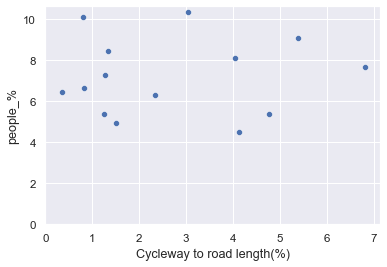

In [48]:
sns.scatterplot(data=df_cycle_ratio, x="Cycleway to road length(%)", y="people_%")
plt.xlim(0)
plt.ylim(0)

Well it was never going to be so simple and clear as we would hope. It seems there is a fairly stable proportion of people across the country, of between 5% and 10% who regularly cycle

(0.0, 3.3927401065476146)

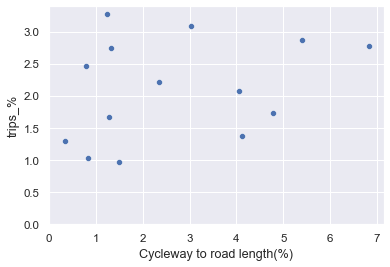

In [49]:
sns.scatterplot(data=df_cycle_ratio, x="Cycleway to road length(%)", y="trips_%")
plt.xlim(0)
plt.ylim(0)

We can begin to see somewhat more of a trend here, that could indicate that an increased ratio of cycleways to road length may result in an increase proportion of journeys being taken by bike than by driving a car

### Assumptions and other limitations

The measure of cycleway to road length ratio as road accessibility by bike is not strictly accurate. That is, cycleways need not follow roads directly and can take their own route. However it still seems appropriate for a measure of cycleway density for an area, scaled by the amount of roads in that area

There was no information available for me in terms of what constitutes a cycleway. That is, whether this measure includes any or all of:
* cyclelanes segregated from traffic
* on road painted cyclelanes
* great ride style gravel cycle routes

There are numerous other factors that could influence the uptake of cycling in different areas. Examples include how hilly an area is, or the typical weather there

## Personal evaluation

As a learning exercise, the main takeaway for me here is the amount of data wrangling and manipulation that can be required. This was by far the most time consuming and frustrating part for me. I'm sure some of what I have done here could be much more elegant and efficiently performed. It was at least satisfying to see myself become more and more proficient over time

It would have been satisfying to try more data analysis now that I have a better grasp of my datasets, and I may come back to this in the future. However for now I am interested in looking at other areas

Ideally, it would be best to have a well defined question to answer when beginning a project such as this. In this case, I didn't realise what I would be able to do, how far I would get, or understand what sort of data I would be able to find before I began